# AE 470 - Assignment 1
## Due Tuesday, Febuary 11, 2025 at 11:59 pm  

In this notebook, using the numerical integration and two-body equations of motion that we have discussed in class, simulate the following scenario.

  - Starting in a circular orbit 200km above the surface of the earth
  - Simulate one orbit
  - At the start of the second orbit, apply an instantaneous change in velocity maneuver that will raise the apogee of the resulting elliptical orbit to 30000km above the surface.
  - Simulate one revolution of this orbit.
  - How can we make this orbit circular at 30000km?  Apply this maneuver and simulate for one revolution.

Create a plot (or plots) of the orbit segments.

Submit this notebook with your work.

You can collaborate with each other, but everyone should submit their own notebook.


In [ ]:
# Do a "Save Notebook As..." with your name in the filename.  For example, "Collins,Eileen_assignment_01_ae470.ipynb"

# Put your name here Jeff Walton

# Add your collaborators names here


In [1]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
try:
    from modsim import *
except ImportError:
    print("Download modsim from the course repository at https://github.com/jeffwalton/AE470_Sp25")

In [3]:
import numpy as np
from matplotlib.pyplot import plot

In [4]:
r_e = 6378 # km
mu_e = 3.986000e+5 # earth, km^3/s^2
r_cir1 = r_e + 200 # km

v_cir1 = np.sqrt(mu_e / r_cir1)

T_cir1 = 2*np.pi/np.sqrt(mu_e)*np.sqrt(r_cir1**3)

r0 = Vector( r_cir1, 0, 0 ) # km
v0 = Vector( 0, v_cir1, 0 ) # km/s

init = State(x=r0.x, y=r0.y, z=r0.z, vx=v0.x, vy=v0.y, vz=v0.z)

system = System(init=init,
                mu=mu_e,
                t_end=T_cir1, # s
               )

show(system)

,value
init,x 6578.000000 y 0.000000 z 0...
mu,398600.0
t_end,5309.480436


In [5]:
def eom_twobodies(t, state, system):
    x, y, z, vx, vy, vz = state  # unpack the state vector
    mu = system.mu
    
    R = Vector(x, y, z)
    r = vector_mag(R)
    V = Vector(vx, vy, vz)
    # print(f"time:{t}, R:[{R.x}, {R.y}, {R.z}]")

    R_dot = V
    R_dotdot = -mu / r**3 * R

    return R_dot.x, R_dot.y, R_dot.z, R_dotdot.x, R_dotdot.y, R_dotdot.z


In [6]:
eom_twobodies(0, init, system)

(0.0, 7.784338495550994, 0.0, -0.009211907238266513, -0.0, -0.0)

In [9]:
results, details = run_solve_ivp(system, eom_twobodies, first_step=10.0, rtol=1.0e-6)

details.message

'The solver successfully reached the end of the integration interval.'

In [10]:
results.head()

,x,y,z,vx,vy,vz
0.000000,6578.000000,0.000000,0.0,0.000000,7.784338,0.0
53.094804,6565.019807,413.036079,0.0,-0.488783,7.768978,0.0
106.189609,6526.130488,824.442009,0.0,-0.975636,7.722957,0.0
159.284413,6461.485324,1232.594673,0.0,-1.458642,7.646456,0.0
212.379217,6371.339725,1635.882244,0.0,-1.935889,7.539779,0.0


In [11]:
import matplotlib.pyplot as plt

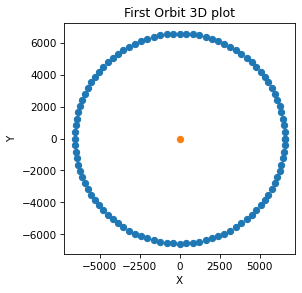

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(results.x, results.y)
ax.set_title("First Orbit 3D plot")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(0, 0 )

plt.gca().set_aspect('equal')

plt.show()

In [13]:
def plot_orbit_2D(x, y, plot_label="2D orbit plot"):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(x, y)
    ax.set_title(plot_label)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.scatter(0, 0)
    
    plt.gca().set_aspect('equal')
    
    plt.show()

In [ ]:
# make plot of all 3 orbits together

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(0, 0, c='orange') 
ax.scatter(orbit_200km_circ.x, orbit_200km_circ.y, c='blue', label='200 km circular')
ax.scatter(orbit_elliptical_transfer.x, orbit_elliptical_transfer.y, c='red', label='elliptical transfer')
ax.scatter(orbit_30000km_circ.x, orbit_30000km_circ.y, c='green', label='30,000 km circular')
ax.set_title("Exercise 1: orbit transfer")
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.gca().set_aspect('equal')
plt.legend(loc='lower right')
plt.show()
